In [ ]:
import pandas as pd



In [ ]:
from google.colab import files #North_2022_UNEDITED.xlsx
uploaded = files.upload()

Saving North_2022_EDITED.xlsx to North_2022_EDITED.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['North_2022_EDITED.xlsx'])) # North_2022_UNEDITED.xlsx

In [ ]:
import pandas as pd
import io
df = pd.read_excel(io.BytesIO(uploaded['North_2022_EDITED.xlsx']))
df['Growout'] = pd.factorize(df['Growout'])[0]
# Assuming you have a DataFrame 'df' with a 'Bread_Volume' column
# Create the new 'Volume_Category' column
bins = [-float('inf'), 942, 1081, float('inf')]#942, 1081,800, 1081,
labels = [0, 1, 2]
df['Volume_Category'] = pd.cut(df['Bread_Volume_2'], bins=bins, labels=labels, include_lowest=True)

# Convert the labels to int64
df['Volume_Category'] = df['Volume_Category'].astype(pd.Int64Dtype())

# Now 'df' contains the new 'Volume_Category' column with int64 data type
print(df[['Bread_Volume_2', 'Volume_Category']])

     Bread_Volume_2  Volume_Category
0             964.5                1
1            1075.0                1
2            1040.0                1
3            1012.5                1
4             991.5                1
..              ...              ...
354          1020.0                1
355          1000.0                1
356           900.0                0
357          1127.0                2
358           990.0                1

[359 rows x 2 columns]


In [ ]:
!pip install dcekit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 3.3 MB/s eta 0:00:00


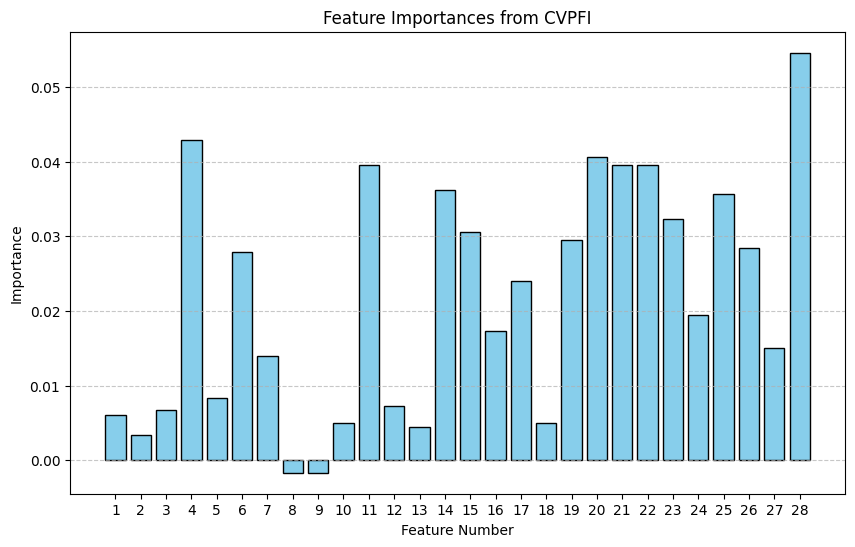

In [ ]:
# Demonstration of CVPFI (Cross-Validated Permutation Feature Importance considering correlation between features) for classification
# in Support Vector Machine (SVM) with Gaussian kernel

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from dcekit.variable_selection import cvpfi
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# settings
n_repeats = 5  # the number of repetitions J
alpha_r = 0.999  # alpha (the significance level) in the r (correlation) consideration, 1 means the correlations between features are not considered
fold_number = 5

# Separate features and target variable
X = df.drop(columns=['Volume_Category'])
y = df['Volume_Category']

# Scale numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

# Encode the target variable
encoder = OrdinalEncoder()
y_train = encoder.fit_transform(y.values.reshape(-1, 1)).reshape(-1)

# Autoscaling (standardizing) features
autoscaled_x_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)

# SVM model with specified hyperparameters
model =  LGBMClassifier(force_col_wise=True, verbose=-1)
model.fit(autoscaled_x_train, y_train)

# CVPFI calculation
importances_mean, importances_std, importances = cvpfi(
    model,
    autoscaled_x_train,
    y_train,
    fold_number=fold_number,
    scoring='accuracy',
    n_repeats=n_repeats,
    alpha_r=alpha_r,
    random_state=9,
)

# Plot feature importances with improved visualization
plt.figure(figsize=(10, 6))
plt.bar(range(1, X_train.shape[1] + 1), importances_mean[range(0, X_train.shape[1])], color='skyblue', edgecolor='black', width=0.8)
plt.xlabel('Feature Number')
plt.ylabel('Importance')
plt.title('Feature Importances from CVPFI')
plt.xticks(range(1, X_train.shape[1] + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
importances_mean


array([ 0.00612813,  0.00334262,  0.00668524,  0.04289694,  0.00835655,
        0.02785515,  0.01392758, -0.00167131, -0.00167131,  0.00501393,
        0.03955432,  0.00724234,  0.00445682,  0.0362117 ,  0.03064067,
        0.01727019,  0.02395543,  0.00501393,  0.02952646,  0.04066852,
        0.03955432,  0.03955432,  0.03231198,  0.01949861,  0.0356546 ,
        0.02841226,  0.01504178,  0.0545961 ])

In [ ]:
#install on python =3.10
!pip install minepy

F1: 
F2: 
F3: 
F4: 
F5: 
F6: 
F7: 
F8: 
F9: 
F10: 
F11: 
F12: 
F13: 
F14: 
F15: 
F16: 
F17: 
F18: 
F19: 
F20: 
F21: 
F22: 
F23: 
F24: 
F25: 
F26: 
F27: 
F28: 


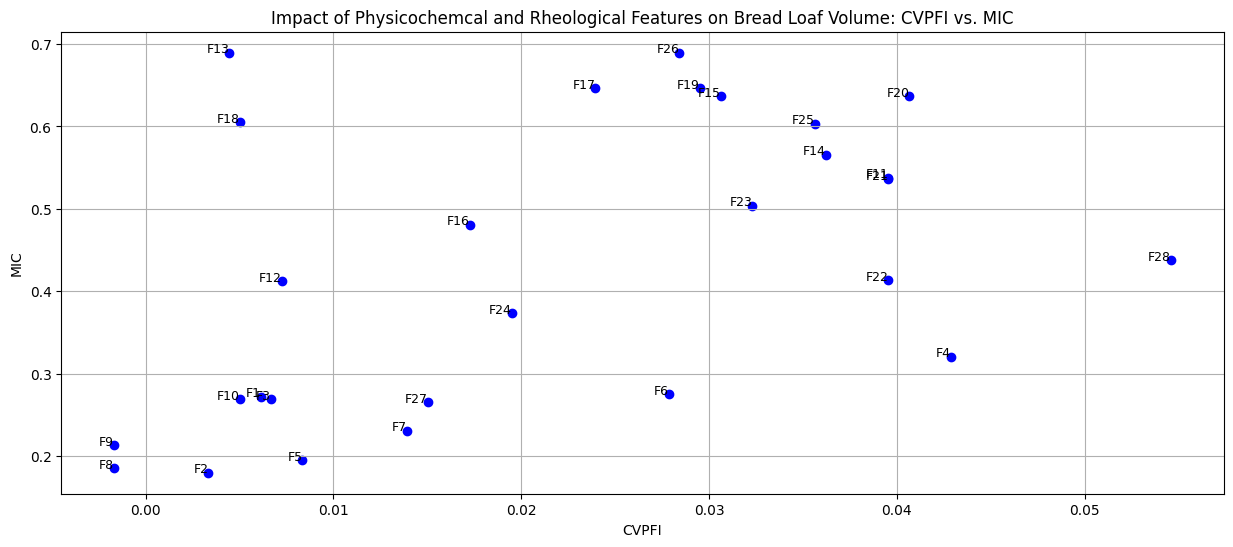

In [ ]:
from minepy import MINE # Import the MINE class
# Calculate MIC for feature similarities
mine = MINE(alpha=0.6, c=15)
mic_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))

for i in range(X_train.shape[1]):
    for j in range(i + 1, X_train.shape[1]):
        mine.compute_score(X_train[:, i], X_train[:, j])
        mic_matrix[i, j] = mine.mic()
        mic_matrix[j, i] = mine.mic()

# Identify similar features
similar_features = {}
threshold = 0.7  # Define a threshold for similarity

for i in range(X_train.shape[1]):
    similar_features[f'F{i+1}'] = [f'F{j+1}' for j in range(X_train.shape[1]) if mic_matrix[i, j] > threshold and i != j]

# Print similar features
for feature, similar in similar_features.items():
    print(f"{feature}: {', '.join(similar)}")

# Plot CVPFI with MIC and feature labels
plt.figure(figsize=(15, 6))
for i in range(X_train.shape[1]):
    plt.scatter(importances_mean[i], mic_matrix[i].max(), c='blue', marker='o')
    plt.text(importances_mean[i], mic_matrix[i].max(), f'F{i+1}', fontsize=9, ha='right')

plt.xlabel('CVPFI')
plt.ylabel('MIC')
plt.title('Impact of Physicochemcal and Rheological Features on Bread Loaf Volume: CVPFI vs. MIC')
plt.grid(True)
plt.show()

In [ ]:
# Calculate MIC for feature similarities
mine = MINE(alpha=0.6, c=15)
mic_values = np.zeros(X_train.shape[1])

for i in range(X_train.shape[1]):
    for j in range(i + 1, X_train.shape[1]):
        mine.compute_score(X_train[:, i], X_train[:, j])
        mic_values[i] = max(mic_values[i], mine.mic())
        mic_values[j] = max(mic_values[j], mine.mic())

In [ ]:
mic_values

array([0.27211467, 0.17969101, 0.26877581, 0.32070471, 0.19467109,
       0.2746607 , 0.23071565, 0.18522935, 0.21334058, 0.26877581,
       0.53762801, 0.41224611, 0.68941082, 0.56567955, 0.63691364,
       0.48070133, 0.64617434, 0.60497292, 0.64617434, 0.63691364,
       0.53584434, 0.41340256, 0.5036529 , 0.37295833, 0.60333839,
       0.68941082, 0.26540973, 0.43769261])

In [ ]:
import numpy as np
import pandas as pd

# Assuming `importances_mean` and `mic_values` are arrays with your CVPFI and MIC values respectively.
# And `feature_names` is a list with the names of the features.

# Example data (replace with your actual data)
importances_mean = np.array([ 0.00612813,  0.00334262,  0.00668524,  0.04289694,  0.00835655,
        0.02785515,  0.01392758, -0.00167131, -0.00167131,  0.00501393,
        0.03955432,  0.00724234,  0.00445682,  0.0362117 ,  0.03064067,
        0.01727019,  0.02395543,  0.00501393,  0.02952646,  0.04066852,
        0.03955432,  0.03955432,  0.03231198,  0.01949861,  0.0356546 ,
        0.02841226,  0.01504178,  0.0545961 ])
mic_values = np.array([0.27211467, 0.17969101, 0.26877581, 0.32070471, 0.19467109,
       0.2746607 , 0.23071565, 0.18522935, 0.21334058, 0.26877581,
       0.53762801, 0.41224611, 0.68941082, 0.56567955, 0.63691364,
       0.48070133, 0.64617434, 0.60497292, 0.64617434, 0.63691364,
       0.53584434, 0.41340256, 0.5036529 , 0.37295833, 0.60333839,
       0.68941082, 0.26540973, 0.43769261])
feature_names = [f'F{i}' for i in range(1, 29)]

# Set thresholds
cvpfi_threshold = 0.03 # set importance threshold
mic_threshold = 0.025 #

# Filter features based on thresholds
important_features = [(feature_names[i], importances_mean[i], mic_values[i])
                      for i in range(len(feature_names))
                      if importances_mean[i] >= cvpfi_threshold and mic_values[i] >= mic_threshold]

# List the top important features
important_features_sorted = sorted(important_features, key=lambda x: x[1], reverse=True)
for feature in important_features_sorted:
    print(f"Feature: {feature[0]}, CVPFI: {feature[1]:.2f}, MIC: {feature[2]:.2f}")


Feature: F28, CVPFI: 0.05, MIC: 0.44
Feature: F4, CVPFI: 0.04, MIC: 0.32
Feature: F20, CVPFI: 0.04, MIC: 0.64
Feature: F11, CVPFI: 0.04, MIC: 0.54
Feature: F21, CVPFI: 0.04, MIC: 0.54
Feature: F22, CVPFI: 0.04, MIC: 0.41
Feature: F14, CVPFI: 0.04, MIC: 0.57
Feature: F25, CVPFI: 0.04, MIC: 0.60
Feature: F23, CVPFI: 0.03, MIC: 0.50
Feature: F15, CVPFI: 0.03, MIC: 0.64


F1: 
F2: 
F3: 
F4: 
F5: 
F6: 
F7: 
F8: 
F9: 
F10: 
F11: 
F12: 
F13: 
F14: 
F15: 
F16: 
F17: 
F18: 
F19: 
F20: 
F21: 
F22: 
F23: 
F24: 
F25: 
F26: 
F27: 
F28: 


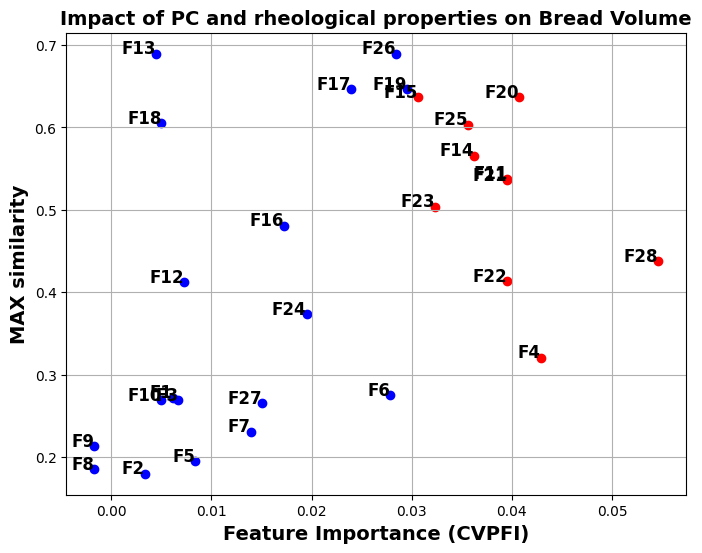

In [ ]:
from minepy import MINE  # Import the MINE class
import numpy as np
import matplotlib.pyplot as plt

# Calculate MIC for feature similarities
mine = MINE(alpha=0.6, c=15)
mic_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))

for i in range(X_train.shape[1]):
    for j in range(i + 1, X_train.shape[1]):
        mine.compute_score(X_train[:, i], X_train[:, j])
        mic_matrix[i, j] = mine.mic()
        mic_matrix[j, i] = mine.mic()

# Identify similar features
similar_features = {}
threshold = 0.7  # Define a threshold for similarity

for i in range(X_train.shape[1]):
    similar_features[f'F{i+1}'] = [f'F{j+1}' for j in range(X_train.shape[1]) if mic_matrix[i, j] > threshold and i != j]

# Print similar features
for feature, similar in similar_features.items():
    print(f"{feature}: {', '.join(similar)}")

# Plot CVPFI with MIC and feature labels
plt.figure(figsize=(8, 6))
highlight_features = [28, 4, 20, 11, 21, 22, 14, 23, 25, 15]

for i in range(X_train.shape[1]):
    color = 'red' if (i + 1) in highlight_features else 'blue'
    plt.scatter(importances_mean[i], mic_matrix[i].max(), c=color, marker='o')
    plt.text(importances_mean[i], mic_matrix[i].max(), f'F{i+1}', fontsize=12, fontweight='bold', ha='right')

plt.xlabel('Feature Importance (CVPFI)', fontsize=14, fontweight='bold')
plt.ylabel('MAX similarity', fontsize=14, fontweight='bold')
plt.title('Impact of PC and rheological properties on Bread Volume', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()
